In [2]:
!pip install matplotlib numpy scikit-learn imgaug opencv-python tensorflow keras


  Using cached imgaug-0.4.0-py2.py3-none-any.whl.metadata (1.8 kB)
Using cached imgaug-0.4.0-py2.py3-none-any.whl (948 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.7 MB/s eta 0:00:00a 0:00:01


In [2]:
!pip install tensorflow-gpu


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "/opt/anaconda3/lib/python3.11/site-packages/setuptools/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/opt/anaconda3/lib/python3.11/site-packages/setuptools/_vendor/packaging/_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/opt/anaconda3/lib/python3.11/site-packages/setuptools/_vendor/packaging/_parser.py", line 82, in _parse_requirement
          url, specifier, marker = _parse_requirement_details(tokeniz

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from imgaug import augmenters  as iaa
import cv2
import random
import os
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, Reshape, Input, Concatenate, GlobalMaxPool2D
from tensorflow.keras.models import Model
# from keras.models import load_model

### Drive Mount

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
!unzip "/content/drive/MyDrive/Colab/Autumn 2024/NNFL/Training.zip" -d "/content/"
!unzip "/content/drive/MyDrive/Colab/Autumn 2024/NNFL/Testing.zip" -d "/content/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/Training/00036/01285_00000.ppm  
  inflating: /content/Training/00036/01285_00001.ppm  
  inflating: /content/Training/00036/01285_00002.ppm  
  inflating: /content/Training/00036/01457_00000.ppm  
  inflating: /content/Training/00036/01457_00001.ppm  
  inflating: /content/Training/00036/01457_00002.ppm  
  inflating: /content/Training/00036/01606_00000.ppm  
  inflating: /content/Training/00036/01606_00001.ppm  
  inflating: /content/Training/00036/01606_00002.ppm  
  inflating: /content/Training/00036/01687_00000.ppm  
  inflating: /content/Training/00036/01687_00001.ppm  
  inflating: /content/Training/00036/01687_00002.ppm  
  inflating: /content/Training/00036/GT-00036.csv  
   creating: /content/Training/00037/
  inflating: /content/Training/00037/00099_00000.ppm  
  inflating: /content/Training/00037/00099_00001.ppm  
  inflating: /content/Training/00037/00099_00002.ppm  
  inflating: /content/Training/000

In [4]:
!rm '/content/Training/Readme.txt'
!rm '/content/Testing/Readme.txt'

### Variable initialization  ##################

In [5]:
path = "/content/Training"
path2 = "/content/Testing"
WIDTH = 100
HEIGHT = 100
imageDimesions = (WIDTH, HEIGHT, 3)
testRatio = 0.2
validationRatio = 0.2
# santos

### Importing of the Images  #######################

In [6]:
images = []
classNumber = []
myList = os.listdir(path)
print("Total Classes:",len(myList))
noOfClasses=len(myList)
print("Importing all Classes====>")
for x in range (0,noOfClasses):
    if(x<10):
      xx='0000'
    else:
       xx='000'
    pictures = os.listdir(path+"/"+xx+str(x))
    for y in pictures:
        if y.endswith('.ppm'):
          curImage = cv2.imread(path+"/"+xx+str(x)+"/"+y)
          curImage = cv2.resize(curImage,(WIDTH,HEIGHT))
          images.append(curImage)
          classNumber.append(x)
    print(x, end =" ")
images = np.array(images)
classNumber = np.array(classNumber)
# santos

Total Classes: 62
Importing all Classes====>
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 

In [7]:
X_test = []
y_test = []
myList = os.listdir(path2)
print("Total Classes:",len(myList))
noOfClasses=len(myList)
print("Importing all Classes====>")
for x in range (0,noOfClasses):
    if(x<10):
      xx='0000'
    else:
       xx='000'
    pictures = os.listdir(path2+"/"+xx+str(x))
    for y in pictures:
        if y.endswith('.ppm'):
          curImage = cv2.imread(path2+"/"+xx+str(x)+"/"+y)
          curImage = cv2.resize(curImage,(WIDTH,HEIGHT))
          X_test.append(curImage)
          y_test.append(x)
    print(x, end =" ")
X_test = np.array(X_test)
y_test = np.array(y_test)

Total Classes: 62
Importing all Classes====>
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 

### Split Data   ############################

In [8]:
# X_train, X_test, y_train, y_test = train_test_split(images, classNumber, test_size=testRatio)
X_train, X_valid, y_train, y_valid = train_test_split(images, classNumber, test_size=validationRatio)

print('X train Shape: ',X_train.shape)
print('Y train Shape: ',y_train.shape)

print('X test Shape: ',X_test.shape)
print('Y test Shape: ',y_test.shape)

print('X valid Shape: ',X_valid.shape)
print('Y valid Shape: ',y_valid.shape)

X train Shape:  (3660, 100, 100, 3)
Y train Shape:  (3660,)
X test Shape:  (2520, 100, 100, 3)
Y test Shape:  (2520,)
X valid Shape:  (915, 100, 100, 3)
Y valid Shape:  (915,)


###    About the Dataset   #################

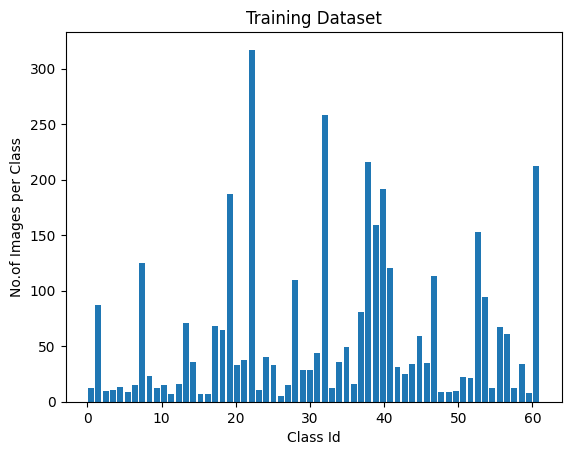

In [9]:
plt.hist(y_train, bins= 62,rwidth=0.8)
plt.title('Training Dataset')
plt.xlabel('Class Id')
plt.ylabel('No.of Images per Class')
plt.show()

###  image augmentation Function  #########

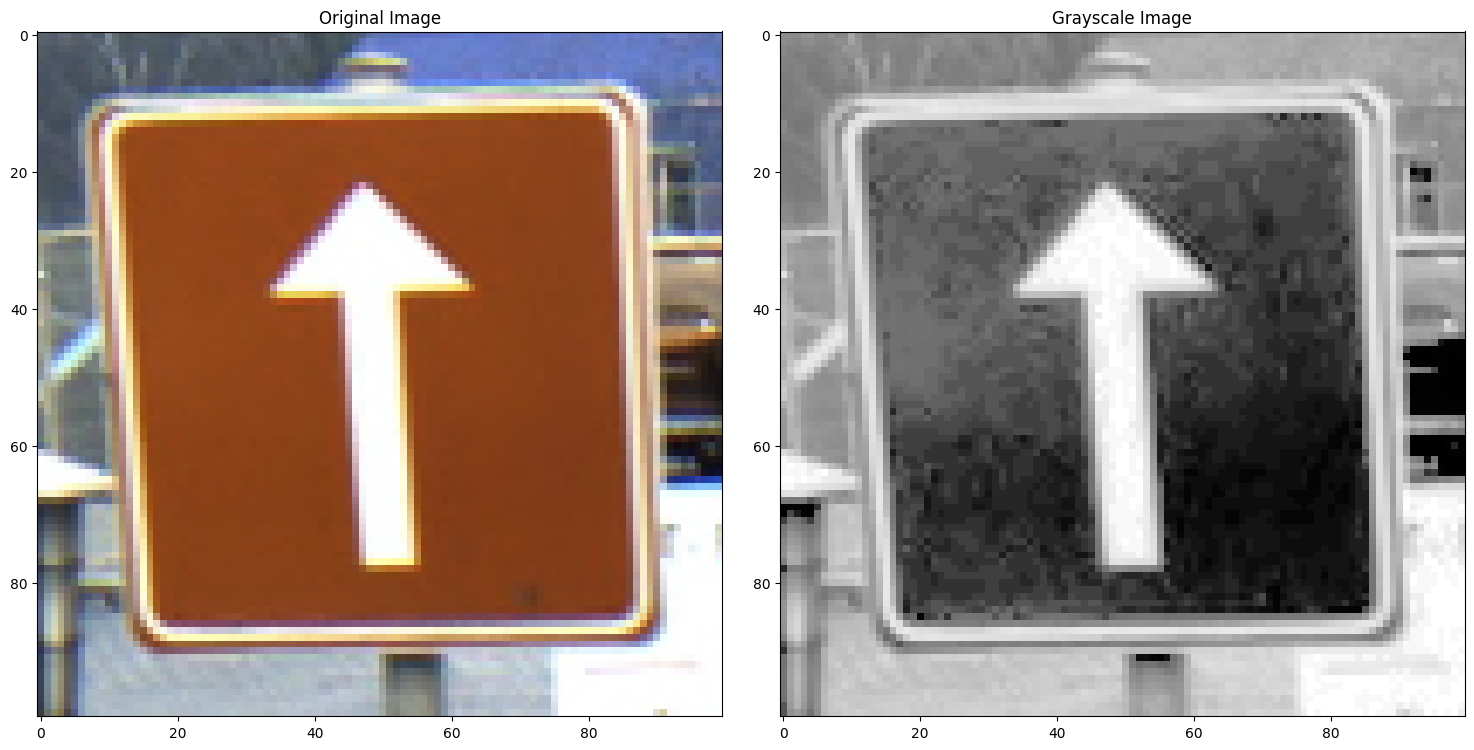

In [10]:
def Grayscale(image):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image = cv2.equalizeHist(image)
    image = image / 255.0
    return image


index = random.randint(0,len(X_train)-1)
image= X_train[index]
label= y_train [index]
grayscale_image = Grayscale(image)


fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(grayscale_image, cmap='gray')
axs[1].set_title('Grayscale Image')
plt.show()

Text(0.5, 1.0, 'Zoomed Image')

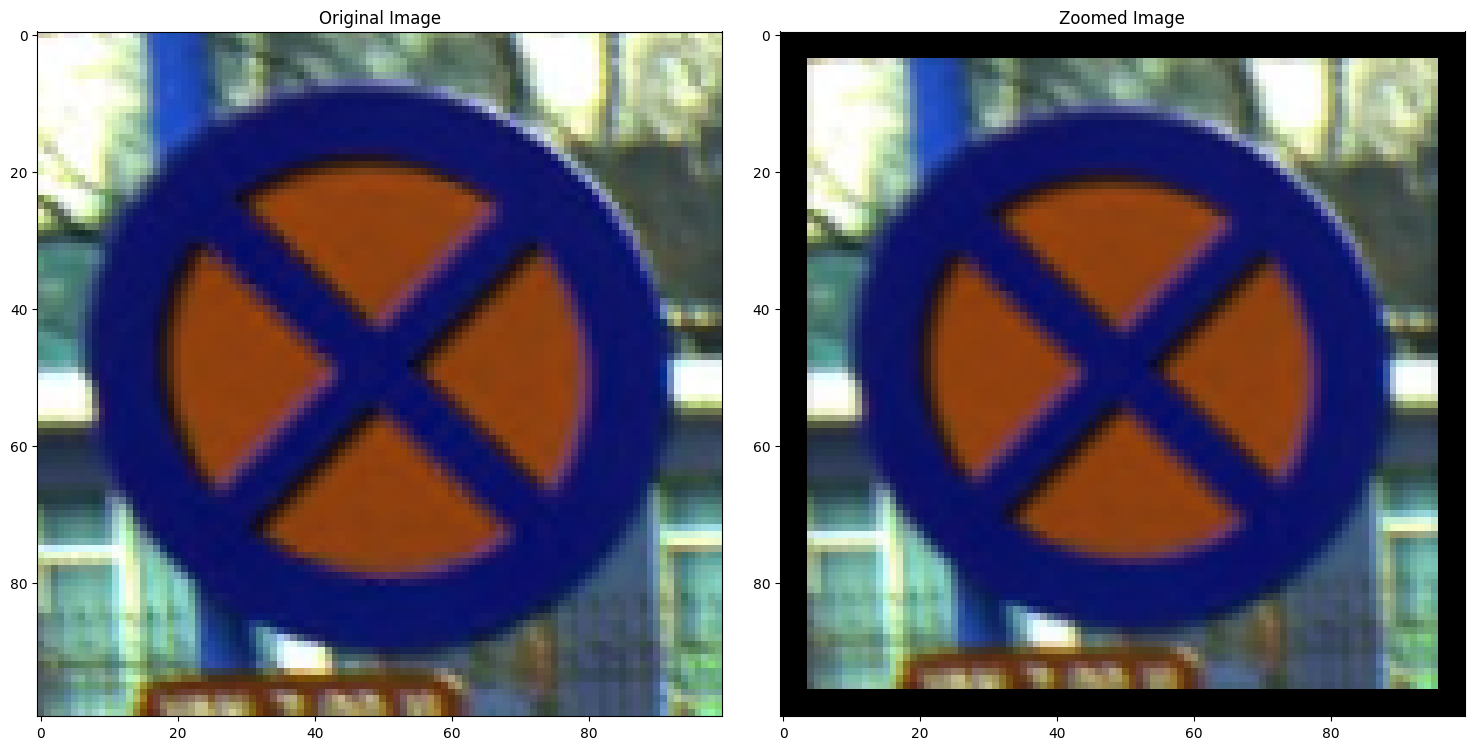

In [11]:
def Zoom(image):
  zoom_image = iaa.Affine(scale = (0.9, 1.3))
  image = zoom_image.augment_image(image)
  return image


index = random.randint(0,len(X_train)-1)
image= X_train[index]
label= y_train [index]
zoomed_image = Zoom(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')
# santos

Text(0.5, 1.0, 'Panned Image')

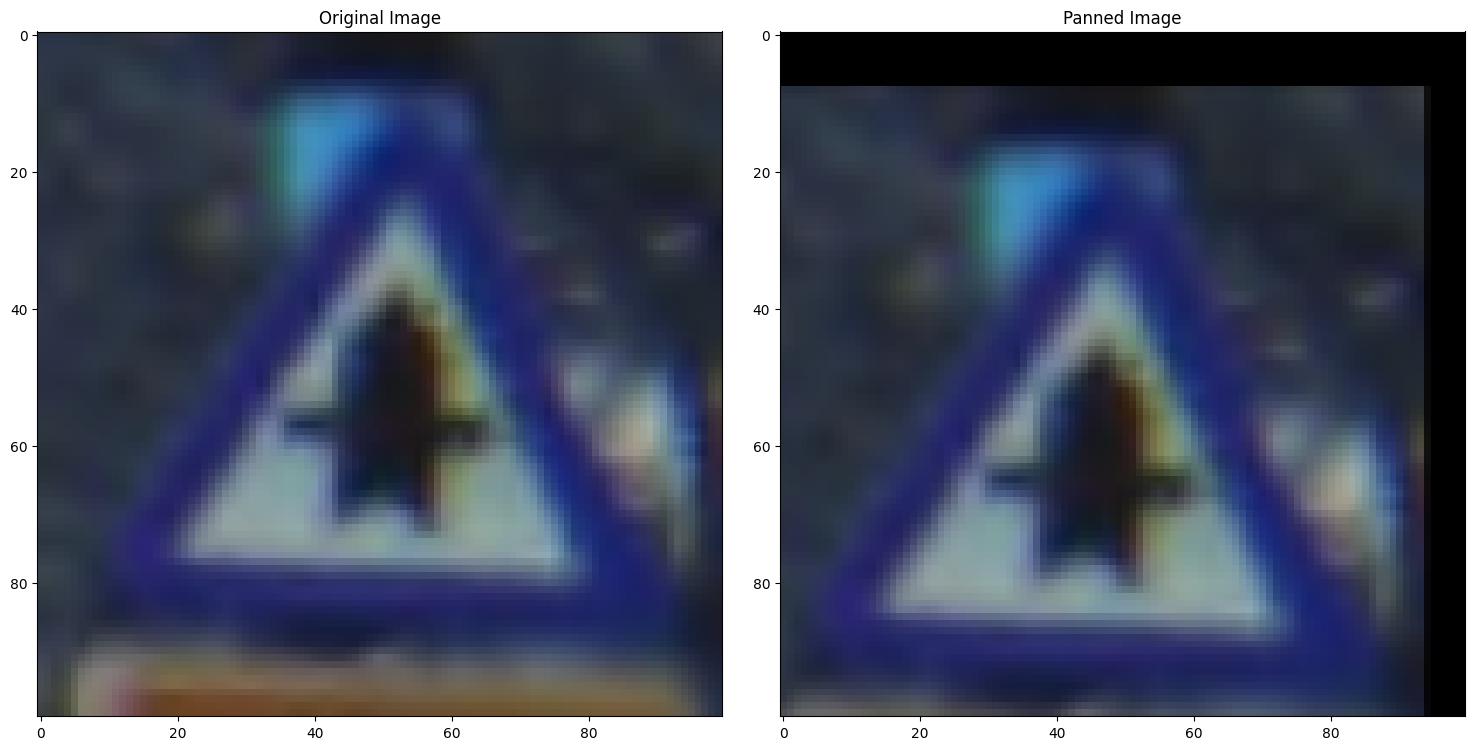

In [12]:
def Pan(image):
  pan_image = iaa.Affine(translate_percent={'x': (-0.1, 0.1), 'y': (-0.1, 0.1)})
  image = pan_image.augment_image(image)
  return image

index = random.randint(0,len(X_train)-1)
image= X_train[index]
label= y_train [index]
panned_image = Pan(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')
# santos

Text(0.5, 1.0, 'Brightened Image')

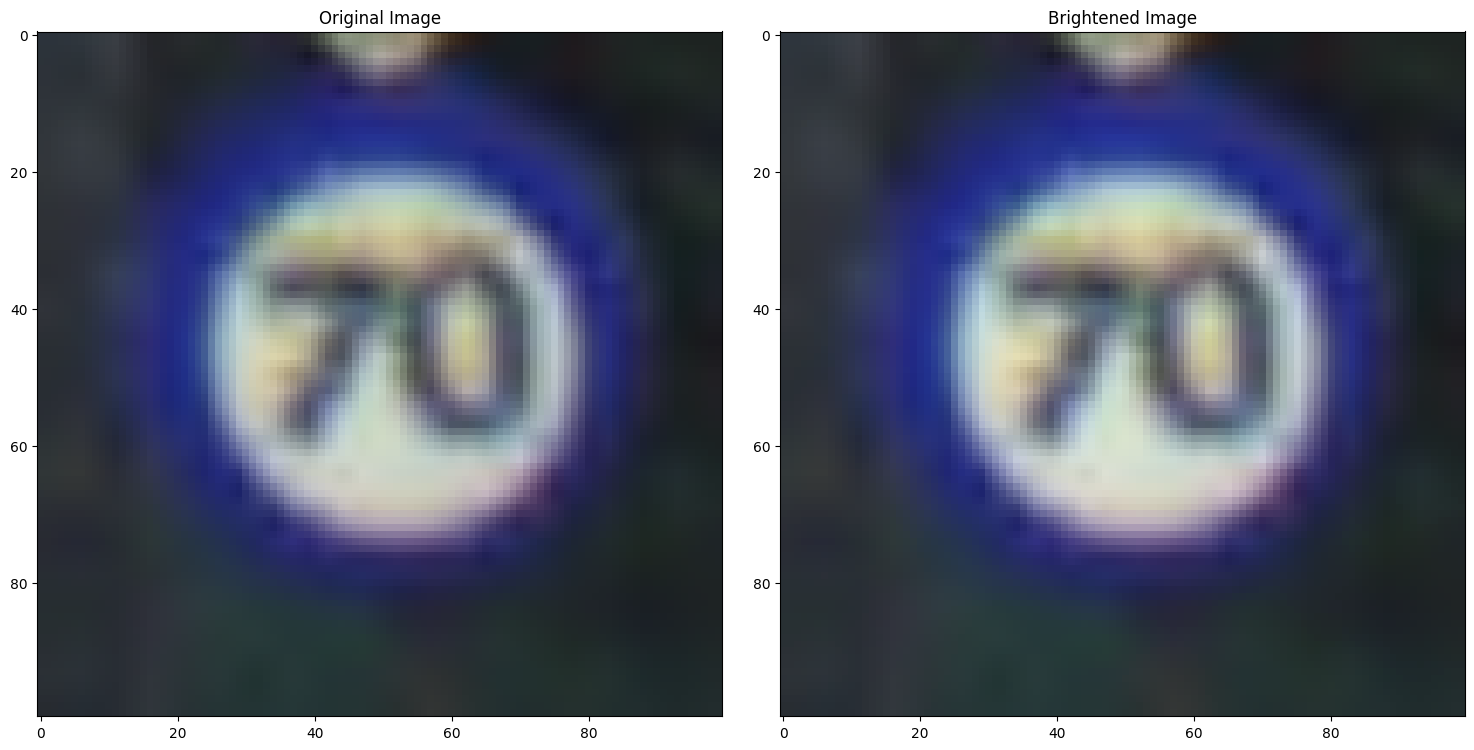

In [13]:
def Img_random_brightness(image):
  brightness = iaa.Multiply((0.2, 1.8))
  image = brightness.augment_image(image)
  return image

index = random.randint(0,len(X_train)-1)
image= X_train[index]
label= y_train [index]
bright_image = Img_random_brightness(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(bright_image)
axs[1].set_title('Brightened Image')
# santos

Text(0.5, 1.0, 'Rotated Image')

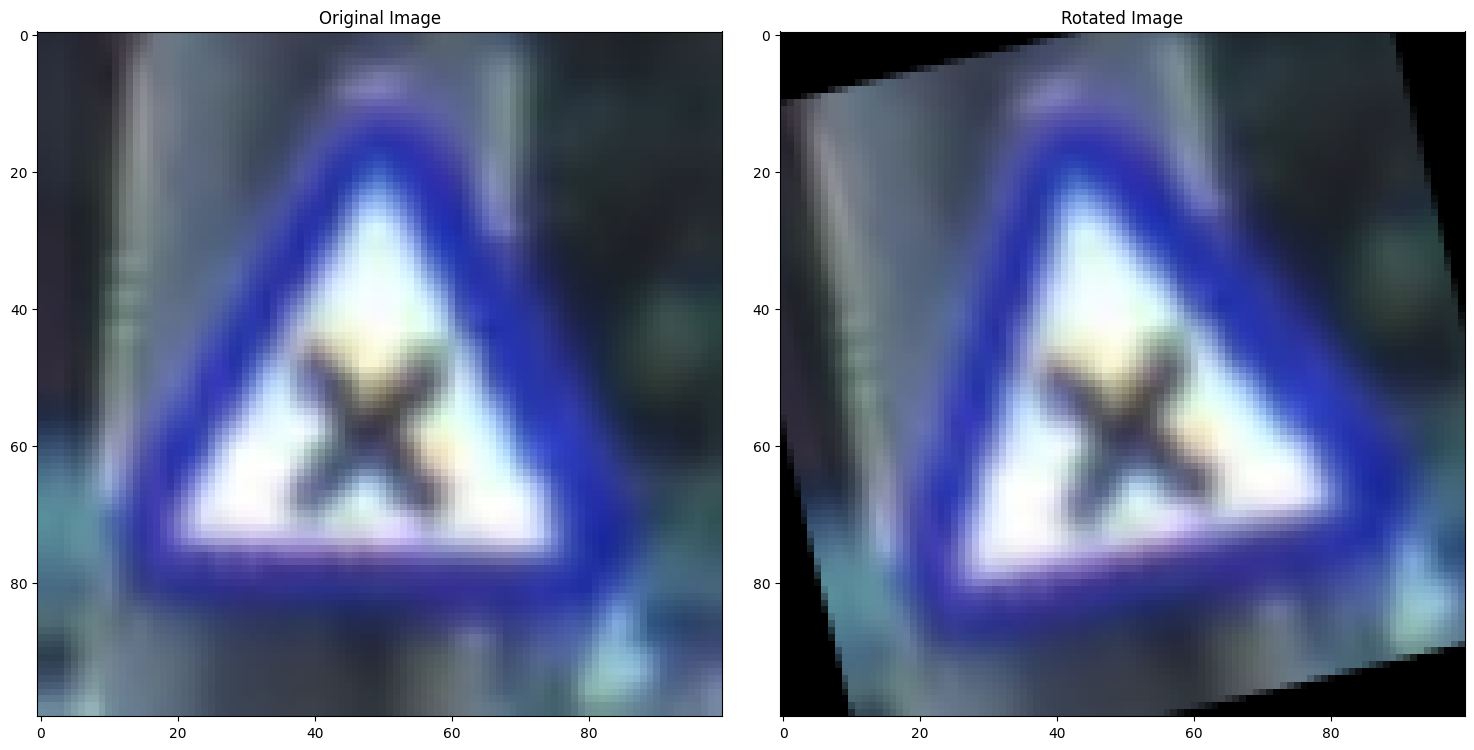

In [14]:
def Rotate(image):
  rotate_image = iaa.Affine(rotate=(-25, 25))
  image = rotate_image.augment_image(image)
  return image

index = random.randint(0,len(X_train)-1)
image= X_train[index]
label= y_train [index]
rotate_image = Rotate(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(rotate_image)
axs[1].set_title('Rotated Image')
# santos

###  Augmentation for Zoom  #######

In [15]:
augmented_zoom_image = []
augmented_zoom_label = []

In [16]:
for i in range(len(y_train)):
    image = X_train[i]
    label = y_train[i]
    # plt.imshow(image)
    # plt.show()
    zoomed_image = Zoom(image)
    zoomed_image = Grayscale(zoomed_image)
    augmented_zoom_image.append(zoomed_image)
    augmented_zoom_label.append(label)

###  Augmentation for Pan  #######

In [17]:
augmented_pan_image = []
augmented_pan_label = []

In [18]:
for i in range(len(y_train)):
    image = X_train[i]
    label = y_train[i]
    panned_image = Pan(image)
    panned_image = Grayscale(panned_image)
    augmented_pan_image.append(panned_image)
    augmented_pan_label.append(label)

###  Augmentation for Brightness  #######

In [19]:
augmented_bright_image = []
augmented_bright_label = []

In [20]:
for i in range(len(y_train)):
    image = X_train[i]
    label = y_train[i]
    bright_image = Img_random_brightness(image)
    bright_image = Grayscale(bright_image)
    augmented_bright_image.append(bright_image)
    augmented_bright_label.append(label)

### Augmentation for Rotation

In [21]:
augmented_rotate_image = []
augmented_rotate_label = []

In [22]:
for i in range(len(y_train)):
    image = X_train[i]
    label = y_train[i]
    rotate_image = Rotate(image)
    rotate_image = Grayscale(rotate_image)
    augmented_rotate_image.append(rotate_image)
    augmented_rotate_label.append(label)

###  Convert To Grayscale  #######

In [23]:
X_train = np.array(list(map(Grayscale, X_train)))
X_test = np.array(list(map(Grayscale, X_test)))
X_valid = np.array(list(map(Grayscale, X_valid)))

### Concate All the augmented images

In [24]:
#  change image to np array

augmented_zoom_image = np.array(augmented_zoom_image)
augmented_pan_image = np.array(augmented_pan_image)
augmented_bright_image = np.array(augmented_bright_image)
augmented_rotate_image = np.array(augmented_rotate_image)
X_train = np.array(X_train)

# concatenate all image
X_train = np.concatenate((X_train, augmented_zoom_image,augmented_pan_image, augmented_bright_image,augmented_rotate_image))

#  change label to np array

augmented_zoom_label = np.array(augmented_zoom_label)
augmented_pan_label = np.array(augmented_pan_label)
augmented_bright_label = np.array(augmented_bright_label)
augmented_rotate_label = np.array(augmented_rotate_label)
y_train = np.array(y_train)

# concatenate all label
y_train = np.concatenate((y_train, augmented_zoom_label, augmented_pan_label, augmented_bright_label,augmented_rotate_label))

print('Dataset After Augmentation(Image):', X_train.shape)
print('Dataset After Augmentation(Label):', y_train.shape)

Dataset After Augmentation(Image): (18300, 100, 100)
Dataset After Augmentation(Label): (18300,)


###  After Augmentation Dataset  #######

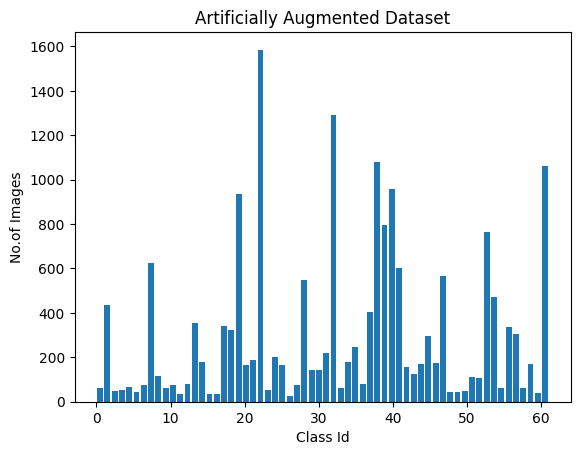

In [25]:
plt.hist(y_train, bins =62,rwidth=0.8)
plt.title('Artificially Augmented Dataset')
plt.xlabel('Class Id')
plt.ylabel('No.of Images')
plt.show()

###  Reshape the Images  #######

In [25]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], X_valid.shape[2], 1)

###  Change to one hot encoded array  ###########

In [26]:
def labels_to_one_hot(y_labels, num_classes):
  matrix_eye = np.eye(num_classes)
  y_labels_array = []
  for i in range(len(y_labels)):
    y_labels_array.append(matrix_eye[:,y_labels[i]])
  return np.array(y_labels_array)

In [27]:
y_train = labels_to_one_hot(y_train, 62)
y_test = labels_to_one_hot(y_test, 62)
y_valid = labels_to_one_hot(y_valid, 62)

print('Y train shape: ',y_train.shape)
print('Y test shape: ',y_test.shape)
print('Y valid shape: ',y_valid.shape)

Y train shape:  (18300, 62)
Y test shape:  (2520, 62)
Y valid shape:  (915, 62)


### Building a CNN on Tensorflow(Keras)  #################

In [29]:
def CNN_model():
  model = Sequential()
  #1st layer
  model.add(Conv2D(64, kernel_size=(5,5), strides=(1,1), input_shape=(WIDTH, HEIGHT,1), activation='relu'))
  #2nd layer
  model.add(Conv2D(48, kernel_size=(5,5), strides=(1,1), activation='relu'))
  #3rd layer
  model.add(Conv2D(36, kernel_size=(5,5), strides=(1,1), activation='relu'))
  #4th layer
  model.add(Conv2D(24, kernel_size=(3,3), activation='relu'))
  #5th layer
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  #1st Dense Layer
  model.add(Flatten())
  #2nd Dense Layer
  model.add(Dense(125, activation='relu'))
  # model.add(Dropout(0.5))
  #3rd Dense Layer
  model.add(Dense(75, activation='relu'))
  model.add(Dropout(0.5))
  #output
  model.add(Dense(62, activation='softmax'))
  #Compile model
  model.compile(Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return model


model = CNN_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 48)        76848     
                                                                 
 conv2d_2 (Conv2D)           (None, 88, 88, 36)        43236     
                                                                 
 conv2d_3 (Conv2D)           (None, 86, 86, 24)        7800      
                                                                 
 conv2d_4 (Conv2D)           (None, 84, 84, 64)        13888     
                                                                 
 flatten (Flatten)           (None, 451584)            0         
                                                                 
 dense (Dense)               (None, 125)               5

In [30]:
# def CNN_model():
#     model = Sequential()
#     model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(WIDTH, HEIGHT, 1), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Flatten())
#     model.add(Dense(128, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(62, activation='softmax'))

#     model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

#     return model
# model=CNN_model()
# print(model.summary())

###  Training the CNN   ####################

In [31]:
history = model.fit(x=X_train, y=y_train,
                    batch_size=40,
                    epochs=30,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    shuffle=True)

Epoch 1/30
 18/458 [>.............................] - ETA: 1:19:46 - loss: 4.0945 - accuracy: 0.0208

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['accuracy'], 'o-g')
plt.plot(history.history['val_accuracy'],'ro-')
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epochs')

###  Evaluate the Trained Model  #############

In [29]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test)
print("Test loss, Test accuracy:", results)

Evaluate on test data
79/79 [==============================] - 155s 2s/step - loss: 0.3119 - accuracy: 0.9587
Test loss, Test accuracy: [0.3119145631790161, 0.958730161190033]


### Save The Model  #################

In [ ]:
model.save("/content/drive/MyDrive/Colab/Autumn 2024/NNFL/tsr7grayoldmodel.h5")